In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Practical Machine Learning\Common_Folder\PML datasets\titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Studying the Data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking null values

<Axes: >

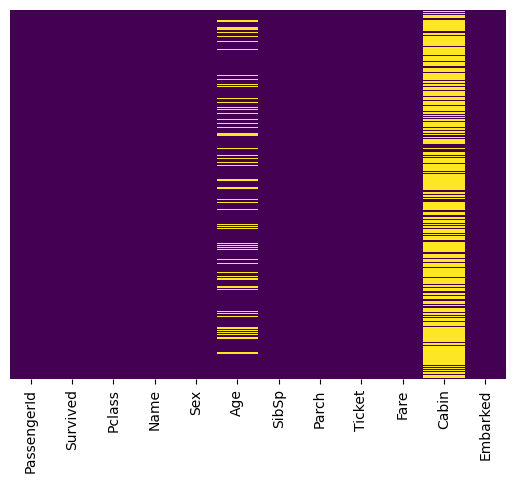

In [4]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False, cmap='viridis')

# Checking how to fill the null values of age 

<Axes: xlabel='Survived', ylabel='count'>

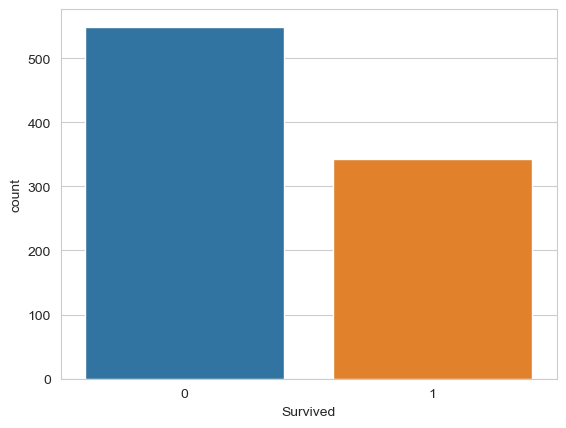

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

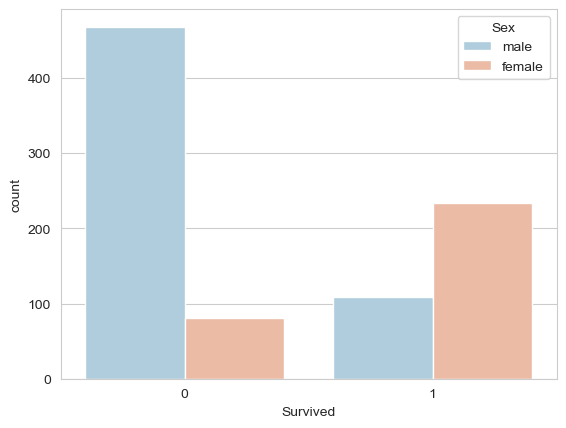

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

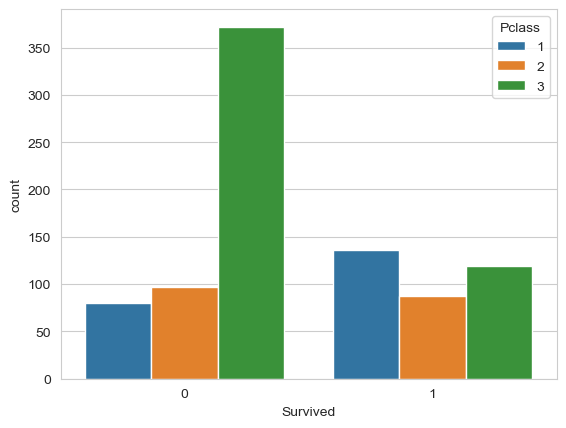

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train)

C:\Users\patil\AppData\Local\Temp\ipykernel_19988\3238756970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)


<Axes: xlabel='Age'>

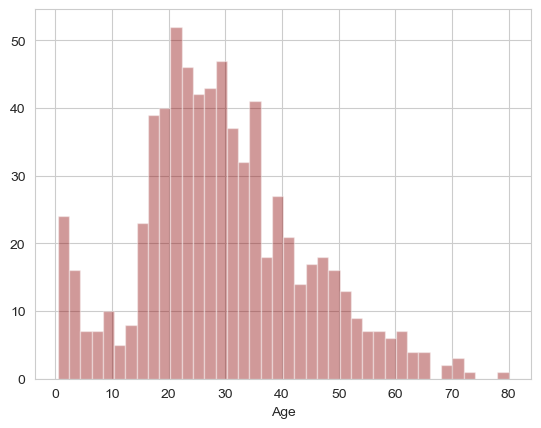

In [8]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

# Checking relation between age and class

<Axes: xlabel='Pclass', ylabel='Age'>

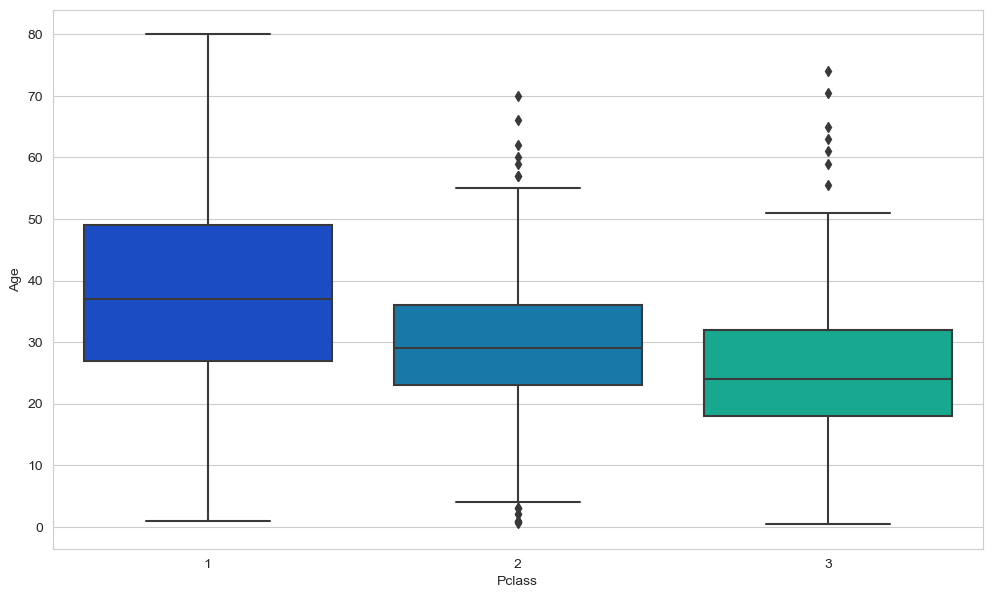

In [9]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

# Cleaning the Data

### Filling null values of age

In [10]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
            return age

Applying the function

In [11]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

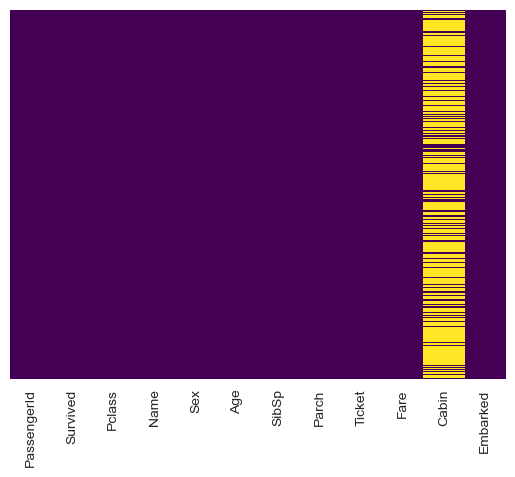

In [13]:
sns.heatmap(train.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Use following link & answer questions

###### https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/chipotle.tsv


In [15]:
df = pd.read_table(r"https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/chipotle.tsv")
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


<Axes: >

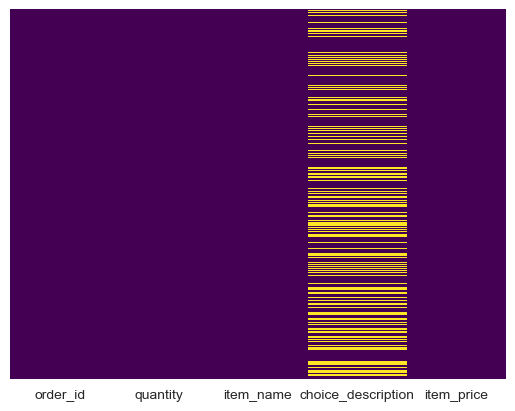

In [16]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
print(df.shape)
df.isna().sum()

(4622, 5)


order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Q1 
### what is total item price

In [19]:
new_df = df.replace({'item_price':'[A-Za-z$]'}, '', regex=True)
new_df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [20]:
# Changing object(String) type to float
new_df['item_price'] = new_df['item_price'].astype(float)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [21]:
# Adding price
item_p_sum = np.sum(new_df['item_price'])
item_p_sum

34500.16

### what is min,max,avg,25%,50%,75% of item price

In [22]:
new_df['item_price'].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

In [23]:
print("min", np.min(new_df['item_price']))
print("max", np.max(new_df['item_price']))
print("avg", np.average(new_df['item_price']))
print("25%", new_df['item_price'].quantile(0.25))
print("50%", new_df['item_price'].quantile(0.50))
print("75%", new_df['item_price'].quantile(0.75))

min 1.09
max 44.25
avg 7.464335785374297
25% 3.39
50% 8.75
75% 9.25


### Display all rows with item name starts with "Chips

In [24]:
chips = new_df[new_df['item_name'].str.startswith('Chips')]
chips

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
10,5,1,Chips and Guacamole,NaN,4.45
14,7,1,Chips and Guacamole,NaN,4.45
15,8,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
...,...,...,...,...,...
4596,1826,1,Chips and Guacamole,NaN,4.45
4600,1827,1,Chips and Guacamole,NaN,4.45
4605,1828,1,Chips and Guacamole,NaN,4.45
4613,1831,1,Chips,NaN,2.15


### Q2 Use tips dataset from seaborn and display graph to show male and female smokers and non smokers 

In [25]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='smoker', ylabel='count'>

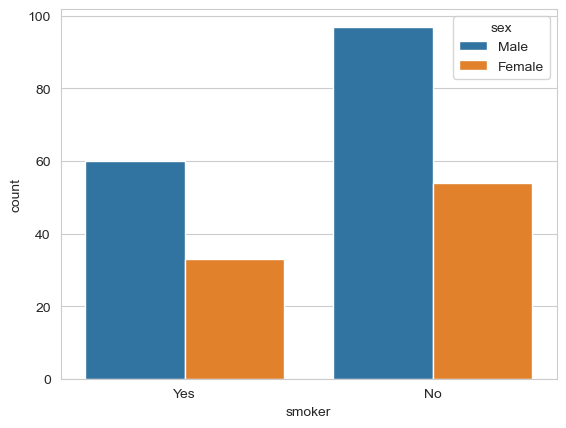

In [26]:
sns.countplot(x='smoker', hue='sex', data=df)

### Find day-wise min,max,avg and 25%,75% of total bill/tips

In [82]:
df.groupby('day').describe()

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

In [92]:
print("min ", df.groupby(['day'])['total_bill'].min() )
print("max ", df.groupby(['day'])['total_bill'].max() )
print("avg ", df.groupby(['day'])['total_bill'].mean() )
print("25% ", df.groupby(['day'])['total_bill'].quantile(0.25))
print("50% ", df.groupby(['day'])['total_bill'].quantile(0.50))

min  day
Thur    7.51
Fri     5.75
Sat     3.07
Sun     7.25
Name: total_bill, dtype: float64
max  day
Thur    43.11
Fri     40.17
Sat     50.81
Sun     48.17
Name: total_bill, dtype: float64
avg  day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64
25%  day
Thur    12.4425
Fri     12.0950
Sat     13.9050
Sun     14.9875
Name: total_bill, dtype: float64
50%  day
Thur    16.20
Fri     15.38
Sat     18.24
Sun     19.63
Name: total_bill, dtype: float64


### On every data how many males and how many females go to hotel

<Axes: xlabel='day', ylabel='count'>

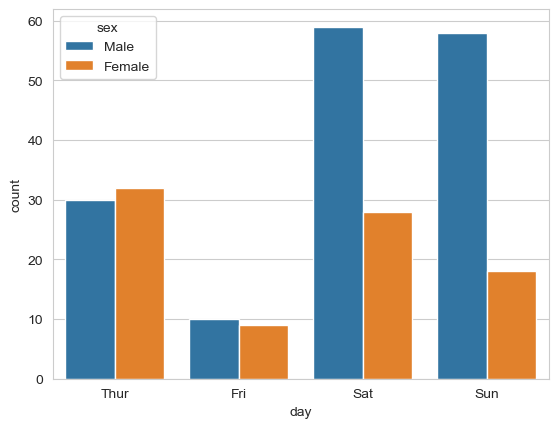

In [29]:
sns.countplot(x='day', hue='sex', data=df)

In [61]:
df.groupby(['day', 'sex']).size()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
dtype: int64

### On which day number of visitors are max and on which day the number of visitors are min

In [114]:
table = df['day'].value_counts()
l1=[]
for i in table.items():
    l1.append(list(i))

l1

[['Sat', 87], ['Sun', 76], ['Thur', 62], ['Fri', 19]]

In [115]:
print(l1[0])
print(l1[-1])

['Sat', 87]
['Fri', 19]
